## EJERCICIO 5 - PRACTICA 4

In [2]:
# configuración para notebook con instalación LOCAL
FUENTES_DIR = '../Fuentes' # carpeta donde se encuentran archivos .py auxiliares
DATOS_DIR   = '../Datos/'  # carpeta donde se encuentran los datasets

# agrega ruta de busqueda donde tenemos archivos .py
import sys
sys.path.append(FUENTES_DIR)

### Importo dataset

In [4]:
import pandas as pd      # para trabajar con archivos de datos csv, excel, etc: https://pandas.pydata.org/docs/getting_started/tutorials.html
import chardet           # para detectar la codificación de texto en archivos
import numpy as np

from sklearn import preprocessing, model_selection
from sklearn.neural_network import MLPClassifier
from matplotlib import pyplot as plt

nombre_archivo = DATOS_DIR + 'zoo.csv' 

#-- detectando la codificación de caracteres usada ----
with open(nombre_archivo, 'rb') as f:
    result = chardet.detect(f.read())  # or readline if the file is large

# recupera el archivo en un objeto dataframe de pandas utilizando la codificación detectada
df = pd.read_csv(nombre_archivo, encoding=result['encoding'])
print(df)

             animal  Tiene_Pelo  Tiene_Plumas  Nace_de_huevo  Toma_Leche  \
0    oso_hormiguero           1             0              0           1   
1          antilope           1             0              0           1   
2            robalo           0             0              1           0   
3               oso           1             0              0           1   
4            jabali           1             0              0           1   
..              ...         ...           ...            ...         ...   
96          canguro           1             0              0           1   
97           avispa           1             0              1           0   
98             lobo           1             0              0           1   
99           gusano           0             0              1           0   
100      troglodito           0             1              1           0   

     Vuela  Acuatico  Depredador  Dentado  Vertebrado  Respira  Venenoso  \
0        0 

### Inspeccion rapida de los datos: analizo cuantos ejemplos hay de cada tipo de Clase

<Axes: >

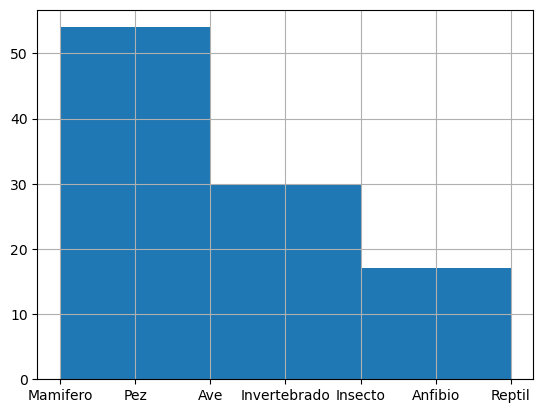

In [6]:
# Para hacer una inspección rápida de los datos
#print(df.head())
#print(df.describe())
df['Clase'].hist(bins=3)

### Entrene un multiperceptrón que sea capaz de clasificar un animal en una de las 7 clases

### Utilice el 70% de los ejemplos para entrenar y el 30% para realizar el testeo

### Elimino la primer columna del df, ya que el nombre del animal no aporta datos:

In [10]:
# Eliminar la primera columna
df = df.iloc[:, 1:]

print("DataFrame modificado:")
print(df)

DataFrame modificado:
     Tiene_Pelo  Tiene_Plumas  Nace_de_huevo  Toma_Leche  Vuela  Acuatico  \
0             1             0              0           1      0         0   
1             1             0              0           1      0         0   
2             0             0              1           0      0         1   
3             1             0              0           1      0         0   
4             1             0              0           1      0         0   
..          ...           ...            ...         ...    ...       ...   
96            1             0              0           1      0         0   
97            1             0              1           0      1         0   
98            1             0              0           1      0         0   
99            0             0              1           0      0         0   
100           0             1              1           0      1         0   

     Depredador  Dentado  Vertebrado  Respira  Veneno

### Divido el data set: 70% para entrenamiento y 30% para testeo:

In [12]:
# %% separa atributos y clases
X_raw = np.array(df.iloc[:, :-1])  # recupera todas las columnas salvo la ultima 
Y_raw = np.array(df.iloc[:,-1])    # recupera solo la ultima columna (valor a predecir)

# Binarizador para convertir el nombre de la clase en one hot encoding
binarizer = preprocessing.LabelBinarizer()

# Binariza cada clase como una combinación de un 1 y 0s
Y_raw = binarizer.fit_transform(Y_raw)
# Y_raw==pd.get_dummies(df[' Balance']).to_numpy() # forma alternativa para codificar

print('Las clases del dataset son :', binarizer.classes_)
print(Y_raw)
# Escala los atributos de los ejemplo
scaler = preprocessing.StandardScaler()
#scaler = preprocessing.MinMaxScaler()
X_raw  = scaler.fit_transform( X_raw )

# %% Separa ejemplos para enternamiento y testeo:
TEST_SIZE = 0.30 # proporcion entre testeo entre entrenamiento y testeo (utiliza 30% de los datos para testeo y el otro 70% de los datos para entrenamiento)
# X_test e Y_test --> datos de testeo (x atributos, y valores a predecir) --> 30% del dataset
# X_train e Y_train --> datos de entrenamiento --> 70% del dataset

X_train, X_test, Y_train, Y_test = model_selection.train_test_split(X_raw, Y_raw, test_size=TEST_SIZE)#, random_state=42)

print('\nDatos de Entrenamiento: %d   Datos de Testeo: %d' % (len(Y_train), len(Y_test) ))


Las clases del dataset son : ['Anfibio' 'Ave' 'Insecto' 'Invertebrado' 'Mamifero' 'Pez' 'Reptil']
[[0 0 0 0 1 0 0]
 [0 0 0 0 1 0 0]
 [0 0 0 0 0 1 0]
 [0 0 0 0 1 0 0]
 [0 0 0 0 1 0 0]
 [0 0 0 0 1 0 0]
 [0 0 0 0 1 0 0]
 [0 0 0 0 0 1 0]
 [0 0 0 0 0 1 0]
 [0 0 0 0 1 0 0]
 [0 0 0 0 1 0 0]
 [0 1 0 0 0 0 0]
 [0 0 0 0 0 1 0]
 [0 0 0 1 0 0 0]
 [0 0 0 1 0 0 0]
 [0 0 0 1 0 0 0]
 [0 1 0 0 0 0 0]
 [0 0 0 0 1 0 0]
 [0 0 0 0 0 1 0]
 [0 0 0 0 1 0 0]
 [0 1 0 0 0 0 0]
 [0 1 0 0 0 0 0]
 [0 0 0 0 1 0 0]
 [0 1 0 0 0 0 0]
 [0 0 1 0 0 0 0]
 [1 0 0 0 0 0 0]
 [1 0 0 0 0 0 0]
 [0 0 0 0 1 0 0]
 [0 0 0 0 1 0 0]
 [0 0 0 0 1 0 0]
 [0 0 1 0 0 0 0]
 [0 0 0 0 1 0 0]
 [0 0 0 0 1 0 0]
 [0 1 0 0 0 0 0]
 [0 0 0 0 0 1 0]
 [0 0 0 0 1 0 0]
 [0 0 0 0 1 0 0]
 [0 1 0 0 0 0 0]
 [0 0 0 0 0 1 0]
 [0 0 1 0 0 0 0]
 [0 0 1 0 0 0 0]
 [0 1 0 0 0 0 0]
 [0 0 1 0 0 0 0]
 [0 1 0 0 0 0 0]
 [0 0 0 0 1 0 0]
 [0 0 0 0 1 0 0]
 [0 0 0 1 0 0 0]
 [0 0 0 0 1 0 0]
 [0 0 0 0 1 0 0]
 [0 0 0 0 1 0 0]
 [0 0 0 0 1 0 0]
 [0 0 1 0 0 0 0]
 [1 0 0 0 0 0 0]
 

### Entrenamiento

In [14]:
FunH = 'tanh'   # identity logistic tanh relu
ocultas = (8)

alfa = 0.005
CotaError = 1.0e-5
MAX_ITE = 1000

modelo = MLPClassifier(max_iter=MAX_ITE, hidden_layer_sizes=ocultas, alpha=alfa,
                       solver='sgd', activation=FunH, tol=CotaError,
                       verbose=False)

modelo.out_activation_ = 'softmax'

modelo.fit(X_train, Y_train)

#  ########### Medición del entrenamiento ######################
# entrenamiento con X_train e Y_train (80% del dataset)
Y_pred = modelo.predict(X_train)
score = modelo.score(X_train, Y_train)

# "invierte" la transformacion binaria para obtener los nombres de las clases
Y_it = binarizer.inverse_transform(Y_train)
Y_pred_it = binarizer.inverse_transform(Y_pred)

# calculo manual del accuracy
print('Efectividad: %6.2f%%' % (100*(Y_pred_it == Y_it).sum()/len(Y_it)) )
print('      Score: %6.2f%%' % (score) )


Efectividad:  84.29%
      Score:   0.80%


C:\Users\W10\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


### Testeo

In [16]:
#  ########### Medición del testeo ######################
# utilizo el 30% de ejemplos del dataset reservado para testear --> estan en X_test e Y_test
Y_pred = modelo.predict(X_test)
score = modelo.score(X_test, Y_test)

# "invierte" la transformacion binaria para obtener los nombres de las clases
Y_it = binarizer.inverse_transform(Y_test)
Y_pred_it = binarizer.inverse_transform(Y_pred)

# calculo manual del accuracy
print('Efectividad: %6.2f%%' % (100*(Y_pred_it == Y_it).sum()/len(Y_it)) )
print('      Score: %6.2f%%' % (score) )

Efectividad:  80.65%
      Score:   0.77%


### Analizo métricas

In [18]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from sklearn import metrics

# Y_pred --> vector con predicciones hechas por la red
# Y_test --> vector con valores reales

#convierto las predicciones y las etiquetas verdaderas de formato one-hot a etiquetas numéricas (escalar) porque confusion_matrix no soporta o-h-encoding
Y_test_labels = binarizer.inverse_transform(Y_test)
Y_pred_labels = binarizer.inverse_transform(Y_pred)

confusion = confusion_matrix(Y_test_labels, Y_pred_labels)
print('\n Matriz de Confusión:')
print(confusion, '\n')

################################ calcula todas las métricas juntas #################################
report = metrics.classification_report(Y_test_labels, Y_pred_labels)
print('Resultado de la clasificación:\n%s' % report)



 Matriz de Confusión:
[[ 1  0  0  0  0  0  0]
 [ 0  7  0  0  0  0  0]
 [ 2  0  0  0  0  0  0]
 [ 2  0  0  1  0  0  0]
 [ 0  0  0  0 12  0  0]
 [ 0  0  0  0  0  4  0]
 [ 1  1  0  0  0  0  0]] 

Resultado de la clasificación:
              precision    recall  f1-score   support

     Anfibio       0.17      1.00      0.29         1
         Ave       0.88      1.00      0.93         7
     Insecto       0.00      0.00      0.00         2
Invertebrado       1.00      0.33      0.50         3
    Mamifero       1.00      1.00      1.00        12
         Pez       1.00      1.00      1.00         4
      Reptil       0.00      0.00      0.00         2

    accuracy                           0.81        31
   macro avg       0.58      0.62      0.53        31
weighted avg       0.82      0.81      0.78        31



C:\Users\W10\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\W10\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\W10\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
